In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import os, shutil

In [ ]:
!cp -r '/content/drive/MyDrive/Colab_Notebooks/211111_개_고양이/data/'  '/content/'
!ls -ls '/content/data'

total 833952
    88 -rw------- 1 root root     88903 Nov 11 01:51 sampleSubmission.csv
277660 -rw------- 1 root root 284321224 Nov 11 01:51 test1.zip
556204 -rw------- 1 root root 569546721 Nov 11 01:51 train.zip


In [ ]:
# 압축풀기
!rm -rf '/content/datasets/'
!unzip '/content/data/test1.zip' -d '/content/datasets/' 
!unzip '/content/data/train.zip' -d '/content/datasets/'

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: train/dog.5499.jpg      
  inflating: train/dog.55.jpg        
  inflating: train/dog.550.jpg       
  inflating: train/dog.5500.jpg      
  inflating: train/dog.5501.jpg      
  inflating: train/dog.5502.jpg      
  inflating: train/dog.5503.jpg      
  inflating: train/dog.5504.jpg      
  inflating: train/dog.5505.jpg      
  inflating: train/dog.5506.jpg      
  inflating: train/dog.5507.jpg      
  inflating: train/dog.5508.jpg      
  inflating: train/dog.5509.jpg      
  inflating: train/dog.551.jpg       
  inflating: train/dog.5510.jpg      
  inflating: train/dog.5511.jpg      
  inflating: train/dog.5512.jpg      
  inflating: train/dog.5513.jpg      
  inflating: train/dog.5514.jpg      
  inflating: train/dog.5515.jpg      
  inflating: train/dog.5516.jpg      
  inflating: train/dog.5517.jpg      
  inflating: train/dog.5518.jpg      
  inflating: train/dog.5519.jpg      
  inflating: train/dog.552.jpg       
  inflating: t

In [ ]:
!ls -al '/content/datasets/train' | head -5
!ls -l '/content/datasets/train' | grep ^- | wc -l
!ls -al '/content/datasets/test1' | head -5
!ls -l '/content/datasets/test1' | grep ^- | wc -l

ls: cannot access '/content/datasets/train': No such file or directory
ls: cannot access '/content/datasets/train': No such file or directory
0
total 304292
drwxr-xr-x 2 root root 303104 Sep 20  2013 .
drwxr-xr-x 4 root root   4096 Nov 11 01:52 ..
-rw-r--r-- 1 root root  54902 Sep 20  2013 10000.jpg
-rw-r--r-- 1 root root  21671 Sep 20  2013 10001.jpg
12500


In [ ]:
# 원본 데이터셋을 압축 해제한 디렉터리 경로
ori_dataset_dir = './datasets/train'

# 소규모 데이터셋을 저장할 디렉터리
base_dir = './datasets/cats_and_dogs_small'

In [ ]:
# 여러번 반복실행을 위해 디렉터리 삭제
if os.path.exists(base_dir):
    shutil.rmtree(base_dir)
os.mkdir(base_dir)

In [ ]:
# 훈련, 검증, 테스트 분할을 위한 디렉터리
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

val_dir = os.path.join(base_dir, 'validation')
os.mkdir(val_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [ ]:
# 훈련용 고양이 사진 디렉터리
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

# 훈련용 강아지 사진 디렉터리
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# 검증용 고양이 사진 디렉터리
val_cats_dir = os.path.join(val_dir, 'cats')
os.mkdir(val_cats_dir)

# 검증용 강아지 사진 디렉터리
val_dogs_dir = os.path.join(val_dir, 'dogs')
os.mkdir(val_dogs_dir)

# 테스트용 고양이 사진 디렉터리
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

# 테스트용 강아지 사진 디렉터리
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

In [ ]:
# 처음 1,000개의 고양이 이미지를 train_cats_dir에 복사합니다
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(ori_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# 다음 500개 고양이 이미지를 validation_cats_dir에 복사합니다
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(ori_dataset_dir, fname)
    dst = os.path.join(val_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# 다음 500개 고양이 이미지를 test_cats_dir에 복사합니다
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(ori_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# 처음 1,000개의 강아지 이미지를 train_dogs_dir에 복사합니다
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(ori_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# 다음 500개 강아지 이미지를 validation_dogs_dir에 복사합니다
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(ori_dataset_dir, fname)
    dst = os.path.join(val_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# 다음 500개 강아지 이미지를 test_dogs_dir에 복사합니다
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(ori_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [ ]:
print('훈련용 고양이 이미지 전체 개수:', len(os.listdir(train_cats_dir)))
print('훈련용 강아지 이미지 전체 개수:', len(os.listdir(train_dogs_dir)))

print('검증용 고양이 이미지 전체 개수:', len(os.listdir(val_cats_dir)))
print('검증용 강아지 이미지 전체 개수:', len(os.listdir(val_dogs_dir)))

print('테스트용 고양이 이미지 전체 개수:', len(os.listdir(test_cats_dir)))
print('테스트용 강아지 이미지 전체 개수:', len(os.listdir(test_dogs_dir)))

훈련용 고양이 이미지 전체 개수: 1000
훈련용 강아지 이미지 전체 개수: 1000
검증용 고양이 이미지 전체 개수: 500
검증용 강아지 이미지 전체 개수: 500
테스트용 고양이 이미지 전체 개수: 500
테스트용 강아지 이미지 전체 개수: 500


In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation="relu", input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(64, (3,3), activation="relu" ))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(128, (3,3), activation="relu" ))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(128, (3,3), activation="relu" ))
model.add(layers.MaxPooling2D(2,2))

# FCL
model.add(layers.Flatten())
model.add(layers.Dense(512, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [ ]:
from tensorflow.keras import optimizers
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# 모든 이미지를 1/255로 스케일을 조정합니다
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,  # 타깃 디렉터리
        target_size=(150, 150),  # 모든 이미지를 150 × 150 크기로 변경
        batch_size=20,
        # binary_crossentropy 손실을 사용하기 때문에 이진 레이블이 필요
        class_mode='binary')

val_generator = test_datagen.flow_from_directory(
        val_dir,  
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
for data_batch, labels_batch in train_generator:
    print('배치 데이터 크기:', data_batch.shape)
    print('배치 레이블 크기:', labels_batch.shape)
    break

In [ ]:
## 경로에 이미지 데이터의 개수 
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(val_cats_dir))
num_dogs_val = len(os.listdir(val_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

print("학습용 데이터 : ", total_train)
print("검증용 데이터 : ", total_val)

학습용 데이터 :  2000
검증용 데이터 :  1000


In [ ]:
batch_size = 20

history = model.fit(train_generator,
                    steps_per_epoch = total_train // batch_size, 
                    epochs=30,
                    validation_data = val_generator,
                    validation_steps = total_val // batch_size)

Epoch 1/30
100/100 [==============================] - 42s 107ms/step - loss: 0.6876 - acc: 0.5465 - val_loss: 0.6712 - val_acc: 0.6050
Epoch 2/30
100/100 [==============================] - 11s 109ms/step - loss: 0.6574 - acc: 0.6145 - val_loss: 0.6404 - val_acc: 0.6450
Epoch 3/30
100/100 [==============================] - 11s 108ms/step - loss: 0.6155 - acc: 0.6575 - val_loss: 0.6027 - val_acc: 0.6710
Epoch 4/30
100/100 [==============================] - 11s 107ms/step - loss: 0.5705 - acc: 0.7100 - val_loss: 0.6360 - val_acc: 0.6390
Epoch 5/30
100/100 [==============================] - 11s 109ms/step - loss: 0.5383 - acc: 0.7410 - val_loss: 0.5555 - val_acc: 0.7230
Epoch 6/30
100/100 [==============================] - 11s 107ms/step - loss: 0.5064 - acc: 0.7615 - val_loss: 0.5542 - val_acc: 0.7070
Epoch 7/30
100/100 [==============================] - 11s 109ms/step - loss: 0.4807 - acc: 0.7685 - val_loss: 0.5540 - val_acc: 0.7120
Epoch 8/30
100/100 [==============================] - 1

In [ ]:
model.save('cats_and_dogs_small_1.h5')

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation="relu", input_shape=(180,180,3)))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(64, (3,3), activation="relu" ))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(128, (3,3), activation="relu" ))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(128, (3,3), activation="relu" ))
model.add(layers.MaxPooling2D(2,2))

# FCL
model.add(layers.Flatten())
model.add(layers.Dense(512, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 89, 89, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 41, 41, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 20, 20, 128)     

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
# 모든 이미지를 1/255로 스케일을 조정합니다
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,  # 타깃 디렉터리
        target_size=(180, 180),  # 모든 이미지를 150 × 150 크기로 변경
        batch_size=20,
        # binary_crossentropy 손실을 사용하기 때문에 이진 레이블이 필요
        class_mode='binary')

val_generator = test_datagen.flow_from_directory(
        val_dir,  
        target_size=(180, 180),
        batch_size=20,
        class_mode='binary')

batch_size = 20

history = model.fit(train_generator,
                    steps_per_epoch = total_train // batch_size, 
                    epochs=30,
                    validation_data = val_generator,
                    validation_steps = total_val // batch_size)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
100/100 [==============================] - 13s 117ms/step - loss: 0.6849 - acc: 0.5565 - val_loss: 0.6626 - val_acc: 0.5420
Epoch 2/30
100/100 [==============================] - 12s 116ms/step - loss: 0.6228 - acc: 0.6570 - val_loss: 0.6085 - val_acc: 0.6670
Epoch 3/30
100/100 [==============================] - 11s 113ms/step - loss: 0.5706 - acc: 0.7065 - val_loss: 0.5923 - val_acc: 0.6800
Epoch 4/30
100/100 [==============================] - 11s 115ms/step - loss: 0.5382 - acc: 0.7290 - val_loss: 0.6038 - val_acc: 0.6650
Epoch 5/30
100/100 [==============================] - 11s 115ms/step - loss: 0.5030 - acc: 0.7470 - val_loss: 0.5675 - val_acc: 0.6900
Epoch 6/30
100/100 [==============================] - 12s 116ms/step - loss: 0.4761 - acc: 0.7730 - val_loss: 0.5700 - val_acc: 0.7010
Epoch 7/30
100/100 [==============================] - 12s 117ms/step - loss: 0.4452 - acc: 0.7890 - val_lo

In [ ]:
model.save('cats_and_dogs_small_2.h5')

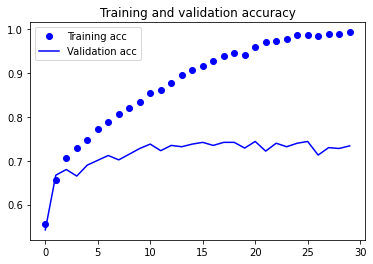

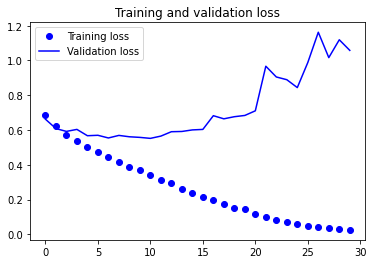

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
batch_size = 20

history = model.fit(train_generator,
                    steps_per_epoch = total_train // batch_size, 
                    epochs=50,
                    validation_data = val_generator,
                    validation_steps = total_val // batch_size)

Epoch 1/50
100/100 [==============================] - 12s 123ms/step - loss: 0.0205 - acc: 0.9985 - val_loss: 1.1451 - val_acc: 0.7510
Epoch 2/50
100/100 [==============================] - 12s 120ms/step - loss: 0.0235 - acc: 0.9935 - val_loss: 1.2464 - val_acc: 0.7400
Epoch 3/50
100/100 [==============================] - 12s 119ms/step - loss: 0.0289 - acc: 0.9925 - val_loss: 1.2121 - val_acc: 0.7520
Epoch 4/50
100/100 [==============================] - 12s 118ms/step - loss: 0.0109 - acc: 0.9965 - val_loss: 1.2943 - val_acc: 0.7330
Epoch 5/50
100/100 [==============================] - 12s 118ms/step - loss: 0.0127 - acc: 0.9975 - val_loss: 1.2990 - val_acc: 0.7390
Epoch 6/50
100/100 [==============================] - 12s 117ms/step - loss: 0.0090 - acc: 0.9975 - val_loss: 1.6634 - val_acc: 0.7090
Epoch 7/50
100/100 [==============================] - 12s 116ms/step - loss: 0.0142 - acc: 0.9970 - val_loss: 1.4104 - val_acc: 0.7420
Epoch 8/50
100/100 [==============================] - 1